In [55]:
import matplotlib.pyplot as plt
import pandas as pd
from utils import *
%matplotlib inline

import numpy as np
# maximum print option
np.set_printoptions(linewidth=400)

from model import Schelling

In [56]:
model = Schelling(width = 20, height = 20, density = 0.8, minority_pc = 0.4, homophily = 3, k = 5,  policy = 'rich_neighborhood', follow_policy=0.2)

[[0.26591479 0.27263421 0.2794403  0.28622228 0.2928298  0.29906976 0.30470915 0.30948769 0.31314225 0.3154421  0.31622777 0.3154421  0.31314225 0.30948769 0.30470915 0.29906976 0.2928298  0.28622228 0.2794403  0.27263421]
 [0.27263421 0.28029881 0.28817613 0.29615165 0.30405597 0.31165459 0.31864497 0.32466792 0.3293406  0.33231239 0.33333333 0.33231239 0.3293406  0.32466792 0.31864497 0.31165459 0.30405597 0.29615165 0.28817613 0.28029881]
 [0.2794403  0.28817613 0.29730178 0.30671173 0.31622777 0.32557609 0.33437015 0.34211277 0.34823528 0.35218565 0.35355339 0.35218565 0.34823528 0.34211277 0.33437015 0.32557609 0.31622777 0.30671173 0.29730178 0.28817613]
 [0.28622228 0.29615165 0.30671173 0.31782897 0.3293406  0.34095108 0.35218565 0.3623623  0.37062186 0.37606031 0.37796447 0.37606031 0.37062186 0.3623623  0.35218565 0.34095108 0.3293406  0.31782897 0.30671173 0.29615165]
 [0.2928298  0.30405597 0.31622777 0.3293406  0.34329452 0.35782241 0.37239099 0.3860974  0.39763536 0.40546

In [57]:
while model.running and model.schedule.steps < 500:
    model.step()
print(model.schedule.steps)  # Show how many steps have actually run

step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
step 14
step 15
step 16
step 17
step 18
step 19
step 20
step 21
step 22
step 23
step 24
step 25
step 26
step 27
step 28
step 29
30


In [58]:
model_out = model.datacollector.get_model_vars_dataframe()

In [59]:
model_out

,perc_happy,segregation
0,0.616822,0.464174
1,0.791277,0.504673
2,0.838006,0.522586
3,0.862928,0.533489
4,0.894081,0.544393
5,0.903427,0.553738
6,0.909657,0.554517
7,0.925234,0.563863
8,0.931464,0.570872
9,0.940810,0.566978


(0.616822429906542, 1.0)

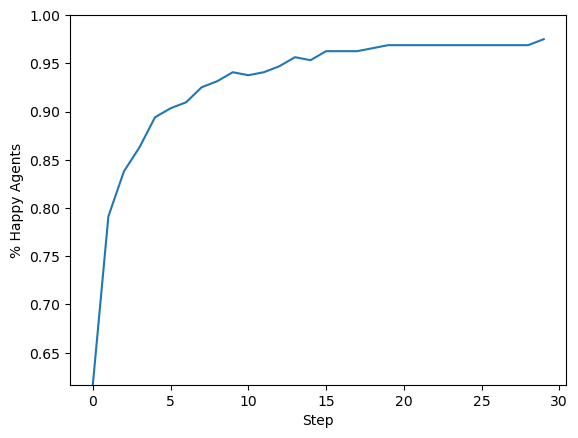

In [60]:
model_out.perc_happy.plot()
plt.xlabel("Step")
plt.ylabel("% Happy Agents")
plt.ylim(min(model_out.perc_happy),1)


Text(0, 0.5, 'perc_segregated_agents')

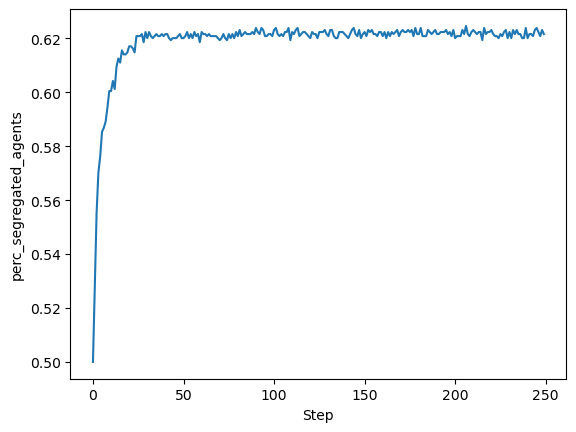

In [7]:
model_out.segregation.plot()
plt.xlabel("Step")
plt.ylabel("perc_segregated_agents")

For testing purposes, here is a table giving each agent's x and y values at each step.

In [8]:
x_positions = model.datacollector.get_agent_vars_dataframe()

In [9]:
x_positions.head()

x   y
Step AgentID        
1    0        15  16
     1         5   0
     2         0   2
     3         0   3
     4        19   8

# Effect of Homophily on segregation

Now, we can do a parameter sweep to see how segregation changes with homophily.

First, we create a function which takes a model instance and returns what fraction of agents are segregated -- that is, have no neighbors of the opposite type.

In [10]:
from mesa import batch_run

Now, we set up the batch run, with a dictionary of fixed and changing parameters. Let's hold everything fixed except for Homophily.

In [11]:
fixed_params = {"height": 10, "width": 10, "density": 0.8, "minority_pc": 0.2}
variable_parms = {"homophily": range(1, 9)}

merged_params = {**fixed_params, **variable_parms}
merged_params 

{'height': 10,
 'width': 10,
 'density': 0.8,
 'minority_pc': 0.2,
 'homophily': range(1, 9)}

In [12]:
%% script False --no-raise-error

results = batch_run(
    Schelling,
    parameters = merged_params,
    iterations=10,
    max_steps=200,
)

results_df = pd.DataFrame(results)
results_df.head()

UsageError: Cell magic `%%` not found.


In [13]:
%% script False --no-raise-error

plt.scatter(results_df.homophily, results_df.segregation)
plt.xlabel("Homophily")
plt.ylabel("Average Happiness")
plt.grid(True)

UsageError: Cell magic `%%` not found.


In [14]:
get_distance((6,3), (0,1))

6.324555320336759

In [15]:
#create a random dictionary

import random

random_dict = {(random.randint(30,40), random.randint(30,40)): random.randint(0, 10) for i in range(10)}

random_dict

{(37, 37): 5,
 (30, 38): 5,
 (35, 37): 2,
 (31, 31): 7,
 (34, 35): 10,
 (35, 33): 7,
 (31, 33): 2,
 (32, 37): 10,
 (36, 34): 7}

In [16]:
#sort the keys by ascending order of the value
sorted(random_dict, key = lambda x: random_dict[x], reverse = False)


[(35, 37),
 (31, 33),
 (37, 37),
 (30, 38),
 (31, 31),
 (35, 33),
 (36, 34),
 (34, 35),
 (32, 37)]

In [17]:
import random 
  
mylist = ["apple", "banana", "mango"] 
count_apple = 0
count_banana = 0
count_mango = 0  


for i in range(1000):

    r = random.choices(mylist, weights = [0.6, 0.6, 0.2], k = 6)[0]
    if r == "apple":
        count_apple += 1
    elif r == "banana":
        count_banana += 1
    else:
        count_mango += 1


In [18]:
count_apple, count_banana, count_mango

(418, 436, 146)

In [19]:
a = 0.0064565675675

#round to 2 decimal places
round(a, 2)

0.01